Sentiment Analysis on US Comments

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
comments = pd.read_csv('F:\PRACTICE\Dataset/UScomments.csv', error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [7]:
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace=True)

In [9]:
import textblob

In [10]:
from textblob import TextBlob

In [11]:
TextBlob('Ive been following you from the start of your...	3').sentiment.polarity

0.0

In [12]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [13]:
comments['polarity'] = polarity

In [14]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


Wordcloud Representation of Sentiments

Positive Polarity

In [21]:
comments_positive = comments[comments['polarity']>=1]

In [22]:
comments_positive.shape

(19390, 5)

In [23]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [25]:
from wordcloud import WordCloud, STOPWORDS

In [27]:
stopwords = set(STOPWORDS)

In [28]:
total_comments = ' '.join(comments_positive['comment_text'])

In [29]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

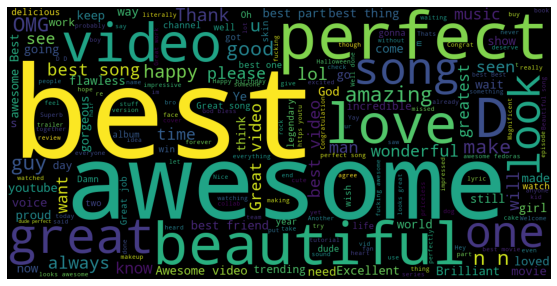

In [30]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Negative Polarity

In [31]:
comments_negative = comments[comments['polarity']==-1]

In [32]:
comments_negative.shape

(3508, 5)

In [33]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [34]:
total_comments = ' '.join(comments_negative['comment_text'])

In [35]:
wordcloud = WordCloud(width = 1000, height= 500, stopwords = stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

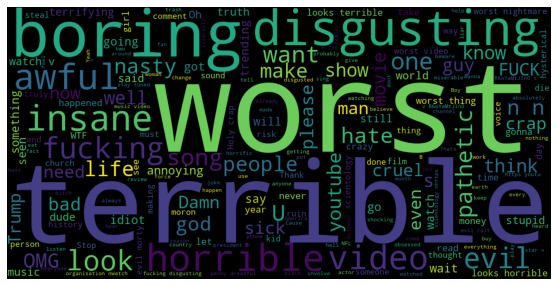

In [36]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')